In [1]:
# Imports
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Load Data
def load_data():
  digits = load_digits()
  X = digits.data
  y = digits.target

  # Do this or you'll get ValueError: all input arrays must have same number of dimensions...
  y = np.expand_dims(y, 1)
  data = np.append(X, y, 1)
  return data

In [3]:
# Visualize Data
def visualize_data(data):
  print(f"X is of type {type(X)}")
  print(X[:10])
  print()
  print(f"y is of type {type(y)}")
  print(y[:10])
  print()
  print("Shape:")
  print(data.shape)

In [4]:
# Verify Shuffling Works
def visualize_shuffle(data):
  temp = data[95:99]
  print("Initial Data:")
  print(temp)
  print()
  print("Shuffled:")
  np.random.shuffle(temp)
  print(temp)

In [5]:
# Shuffle and Create Split Training/Dev/Test 70/15/15%
def shuffle_and_split(data):
  np.random.shuffle(data)

  total_sample = len(data)
  train = data[:int(total_sample*0.7)]
  dev = data[int(total_sample*0.7):int(total_sample*0.85)]
  test = data[int(total_sample*0.85):]
  return total_sample, train, dev, test


In [6]:
# Check for Data Leaks
def data_leaking_check(data1, data2):
  data_leaking = False
  for d1 in data1:
    for d2 in data2:
      if (np.array_equal(d1, d2)):
        data_leaking = True
        print("Find same sample: ")
        print(d1)
  if (not data_leaking):
    print("No Data Leaking.")


In [7]:
# Get Features
def get_features_and_labels(data):
  features = data[:, :-1]
  labels = data[:, -1]
  return features, labels

In [8]:
# Define Distances
def euclidean_distance(row1, row2):
  distance = 0.0
  for i in range(len(row1)-1):
    distance += (row1[i] - row2[i]) ** 2
  return np.sqrt(distance)


def manhattan_distance(row1, row2):
  return np.sum(np.abs(row1-row2))

def chebyshev_distance(row1, row2):
  return np.max(np.abs(row1 - row2))

def get_distance(distance_type, row1, row2):
  distance_functions = {
      'euclidean': euclidean_distance,
      'manhattan': manhattan_distance,
      'chebyshev': chebyshev_distance,
  }
  if distance_type in distance_functions:
    result = distance_functions[distance_type](row1, row2)
    return result
  else:
    raise ValueError(f"Unsupported distance type: {distance_type}.")


In [9]:
# Get Neighbors
def get_neighbors(distance_type, train_x, train_y, test_row, num_neighbors):
  distances = []
  for index in range(len(train_x)):
    train_row = train_x[index]
    train_label = train_y[index]
    distance = get_distance(distance_type, train_row, test_row)
    distances.append((train_row, train_label, distance))

  # Sort them by distance
  distances.sort(key=lambda i: i[2])

  # Get the k nearest neighbors
  output_neighbors = []
  output_labels = []
  output_distances = []
  for index in range(num_neighbors):
    output_neighbors.append(distances[index][0])
    output_labels.append(distances[index][1])
    output_distances.append(distances[index][2])

  return output_neighbors, output_labels, output_distances

In [10]:
# Classification Prediction
def prediction_classify(distance_type, train_x, train_y, test_row, num_neighbors):
  output_neighbors, output_labels, output_distances = get_neighbors(distance_type, train_x, train_y, test_row, num_neighbors)

  label_counts = np.bincount(output_labels)
  prediction = np.argmax(label_counts)
  return prediction

In [11]:
def evaluate_random_samples(distance_type, train_x, train_y, test_x, test_y, num_neighbors, num_samples=10):
    for _ in range(num_samples):

        # Randomly selects index from the test set
        random_index = np.random.choice(len(test_x))

        # Get the features and label for sample
        test_row = test_x[random_index]
        true_label = test_y[random_index]

        # Get neighbors and make prediction
        output_neighbors, output_labels, output_distances = get_neighbors(distance_type, train_x, train_y, test_row, num_neighbors)
        label_counts = np.bincount(output_labels)
        predicted_label = np.argmax(label_counts)

        # Print ground truth and predicted labels
        print(f"Sample: True Label = {true_label}, Predicted Label = {predicted_label}")

In [12]:
# Get predictions and visualize results
def predict_and_visualize(distance_type, num_of_k):
  print(f"Making Predictions with {distance_type} distance.")

  # Load Data
  data = load_data()
  #visualize_data()
  #visualize_shuffle()
  total_sample, train, dev, test = shuffle_and_split(data)
  data_leaking_check(train, dev)

  # Get Labels
  train_x, train_y = get_features_and_labels(train)
  dev_x, dev_y = get_features_and_labels(dev)
  test_x, test_y = get_features_and_labels(test)

  # Make a list of k values
  k_list = list(range(3, num_of_k, 3))
  performances = []

  # Get 10 random data points to visualize
  print(f"10 Randomly Selected Test Data, k=15, metric={distance_type}.")
  evaluate_random_samples(distance_type, train_x, train_y, test_x, test_y, 15, 10)
  print()

  # Run for every k in list
  for k in k_list:
    predicted_labels = []
    for dev_data in dev_x:
      prediction = prediction_classify(distance_type, train_x, train_y, dev_data, k)
      predicted_labels.append(prediction)
    accuracy = accuracy_score(dev_y, predicted_labels)
    performances.append(accuracy)

  # Find the best model and k value
  max_accuracy_index = np.argmax(performances)
  best_k = k_list[max_accuracy_index]
  best_accuracy = performances[max_accuracy_index]
  print(f"Best performance: distance metric: {distance_type}, k={best_k}, accuracy={best_accuracy}")
  print()

  # Plot Everything
  print(f"Plotting {distance_type} accuracy report.")
  plt.figure(figsize=(20,6))
  plt.plot(k_list, performances)
  plt.plot(k_list, performances, 'o')
  plt.xticks(k_list)
  plt.xlabel("k values")
  plt.ylabel("accuracy")
  plt.title(f"{distance_type} Performance on Dev Set")

Making Predictions with euclidean distance.
No Data Leaking.
10 Randomly Selected Test Data, k=15, metric=euclidean.
Sample: True Label = 0.0, Predicted Label = 0
Sample: True Label = 9.0, Predicted Label = 9
Sample: True Label = 9.0, Predicted Label = 9
Sample: True Label = 4.0, Predicted Label = 4
Sample: True Label = 5.0, Predicted Label = 5
Sample: True Label = 0.0, Predicted Label = 0
Sample: True Label = 6.0, Predicted Label = 6
Sample: True Label = 1.0, Predicted Label = 1
Sample: True Label = 6.0, Predicted Label = 6
Sample: True Label = 9.0, Predicted Label = 9

Best performance: distance metric: euclidean, k=3, accuracy=0.9851851851851852

Plotting euclidean accuracy report.
Making Predictions with manhattan distance.
No Data Leaking.
10 Randomly Selected Test Data, k=15, metric=manhattan.
Sample: True Label = 3.0, Predicted Label = 3
Sample: True Label = 4.0, Predicted Label = 4
Sample: True Label = 9.0, Predicted Label = 9
Sample: True Label = 2.0, Predicted Label = 2
Sampl

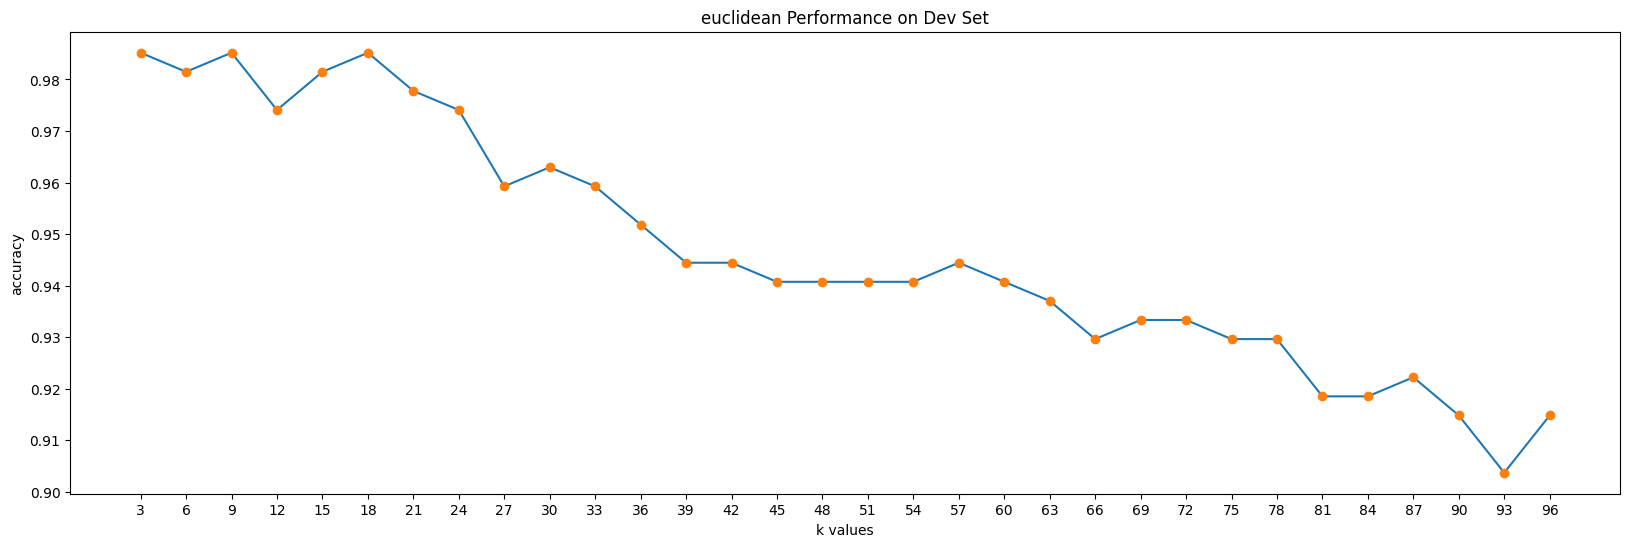

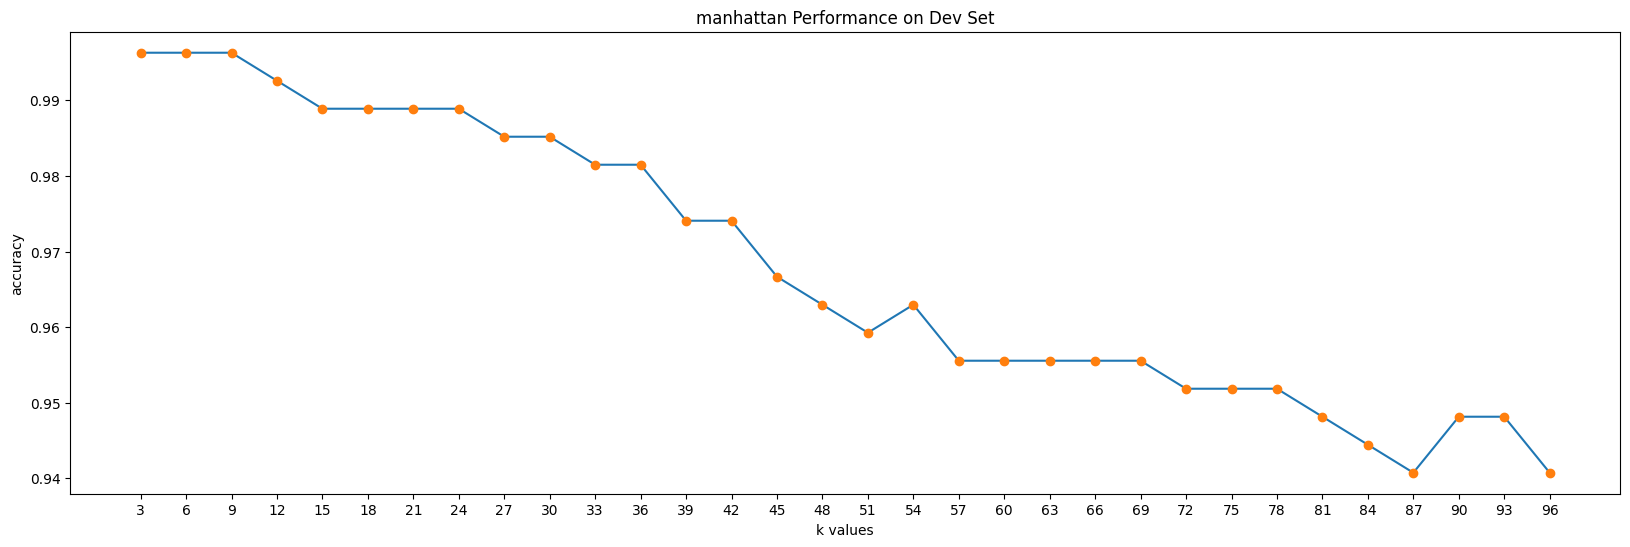

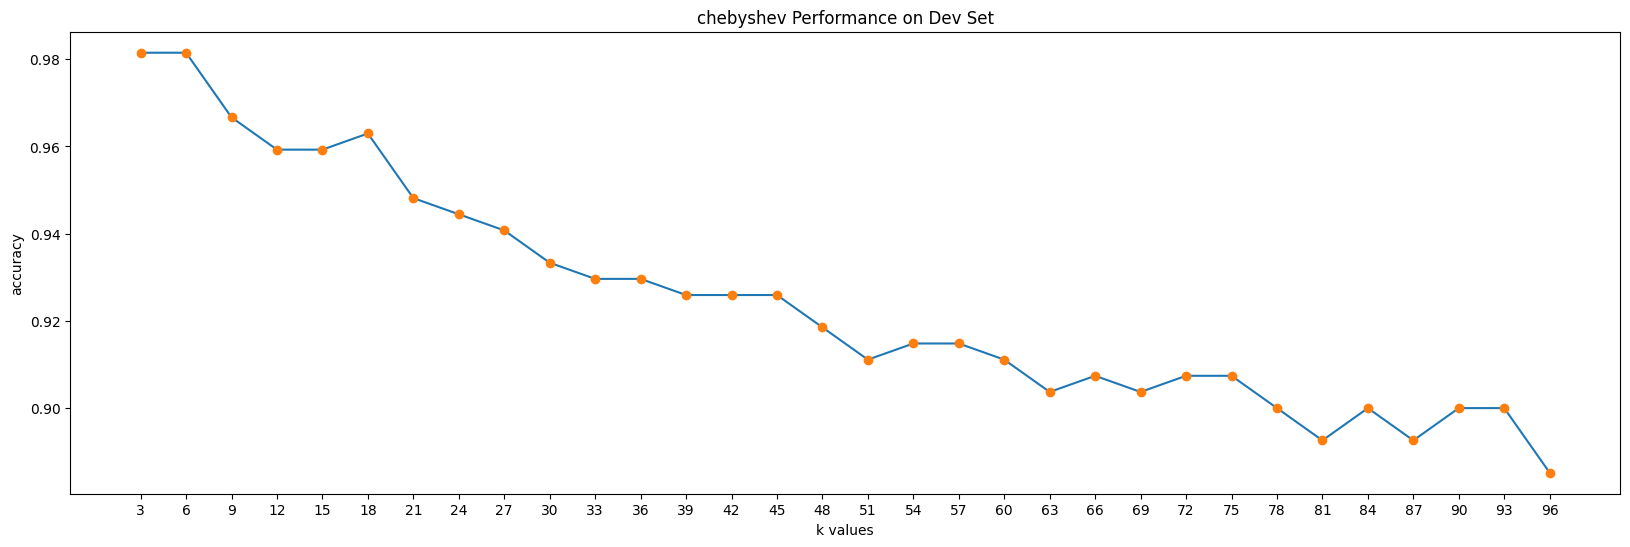

In [13]:
# Set number of k values to test prior to running the program
# The program will start at 3 and increment by 3 each time

num_of_k = 99

distance_types = [
    'euclidean',
    'manhattan',
    'chebyshev',
]

for metric in distance_types:
  predict_and_visualize(metric, num_of_k)

In [14]:
# Run the Test Dataset with results from above
# TODO: automate this step

distance_type = 'chebyshev'
k = 18

def final_test(distance_type, k):
  print(f"Making Predictions with {distance_type}, k={k}.")

  # Load Data
  data = load_data()
  total_sample, train, dev, test = shuffle_and_split(data)
  data_leaking_check(train, dev)

  # Get Labels
  train_x, train_y = get_features_and_labels(train)
  dev_x, dev_y = get_features_and_labels(dev)
  test_x, test_y = get_features_and_labels(test)

  performances = []

  print(f"10 Randomly Selected Test Data, k=15{k}, metric={distance_type}.")
  evaluate_random_samples(distance_type, train_x, train_y, test_x, test_y, k, 10)
  print()

  predicted_labels = []
  for test_data in test_x:
    prediction = prediction_classify(distance_type, train_x, train_y, test_data, k)
    predicted_labels.append(prediction)
  accuracy = accuracy_score(test_y, predicted_labels)
  print(f"{distance_type}'s accuracy at k={k} is {accuracy}")

final_test(distance_type, k)

Making Predictions with chebyshev, k=18.
No Data Leaking.
10 Randomly Selected Test Data, k=1518, metric=chebyshev.
Sample: True Label = 4.0, Predicted Label = 4
Sample: True Label = 7.0, Predicted Label = 7
Sample: True Label = 2.0, Predicted Label = 2
Sample: True Label = 2.0, Predicted Label = 2
Sample: True Label = 2.0, Predicted Label = 2
Sample: True Label = 0.0, Predicted Label = 0
Sample: True Label = 1.0, Predicted Label = 1
Sample: True Label = 6.0, Predicted Label = 6
Sample: True Label = 4.0, Predicted Label = 4
Sample: True Label = 8.0, Predicted Label = 8

chebyshev's accuracy at k=18 is 0.9777777777777777
